In [1]:
import numpy as np
import matplotlib as plt
from models.single_species import ExponentialModel, LogisticModel, MoranModel
from models.multi_species import HostParasiteModel
from analysis.visualizer import plot_trajectory, plot_bifurcation_diagram, plot_phase_portrait


1. Экспоненциальная модель


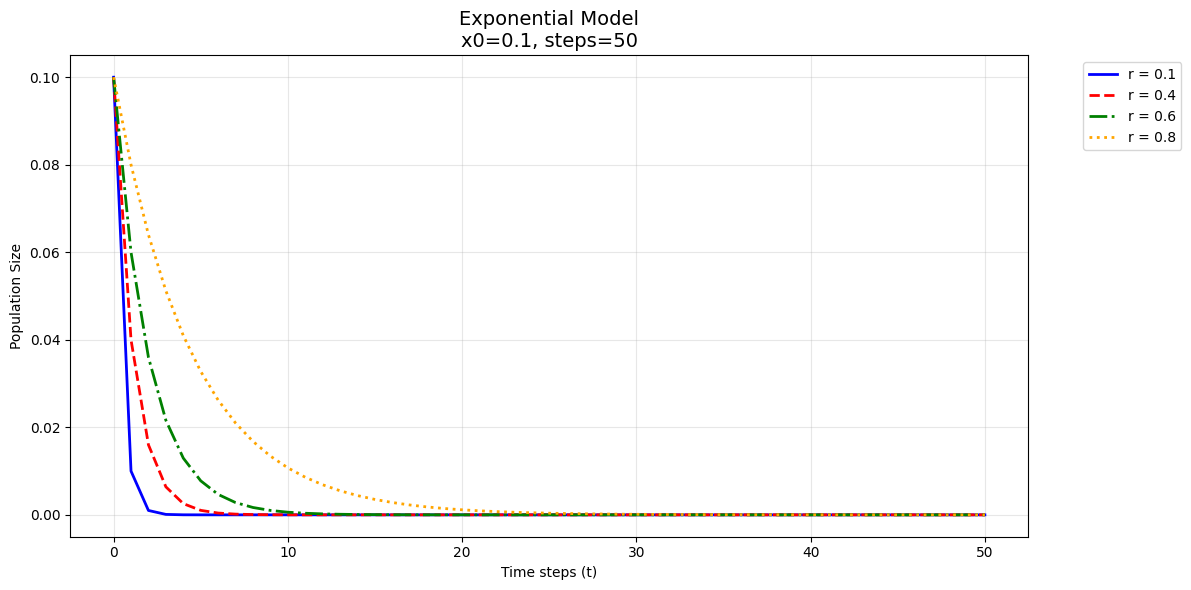

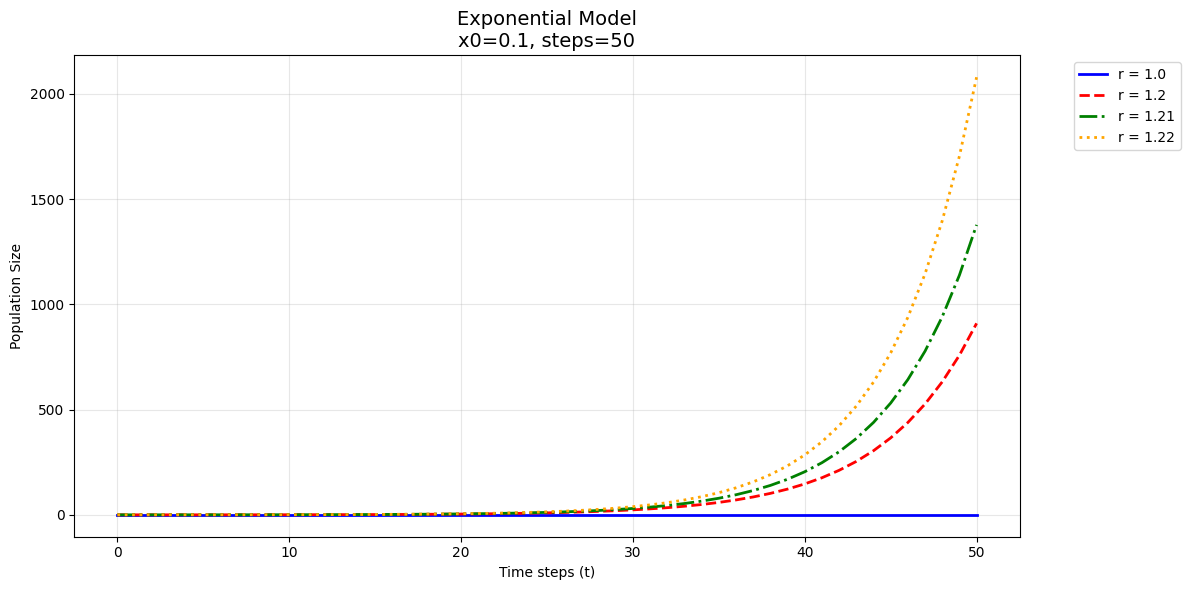

In [2]:
# 1. Экспоненциальная модель: Сравнение разных параметров r
print("\n1. Экспоненциальная модель")
params_list = [[0.1, 0.4, 0.6, 0.8], [1.0, 1.2, 1.21, 1.22]]
trajs = []
labels = []

for i in range(len(params_list)):
    for r in params_list[i]:
        model = ExponentialModel({'r': r})
        traj = model.simulate(initial_state=0.1, steps=50)
        trajs.append(traj)
        labels.append(f'r = {r}')
    
    plot_trajectory(trajs, 
                    title="Exponential Model", 
                    param_str="x0=0.1, steps=50",
                    labels=labels)
    
    trajs.clear()
    labels.clear()


2. Логистическая модель - сравнение параметров


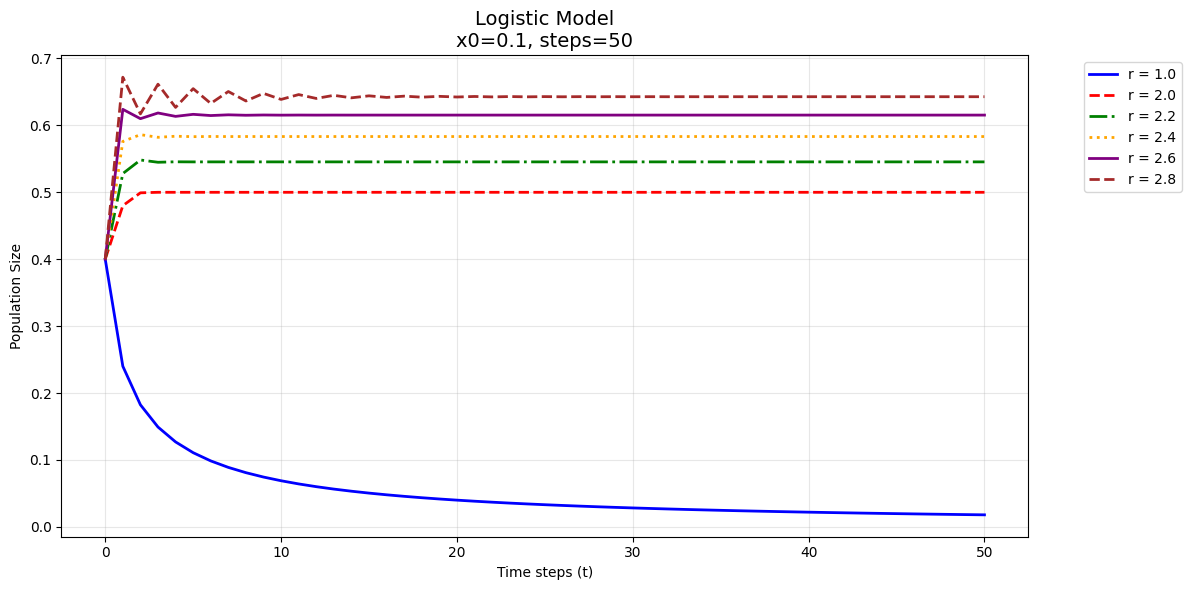

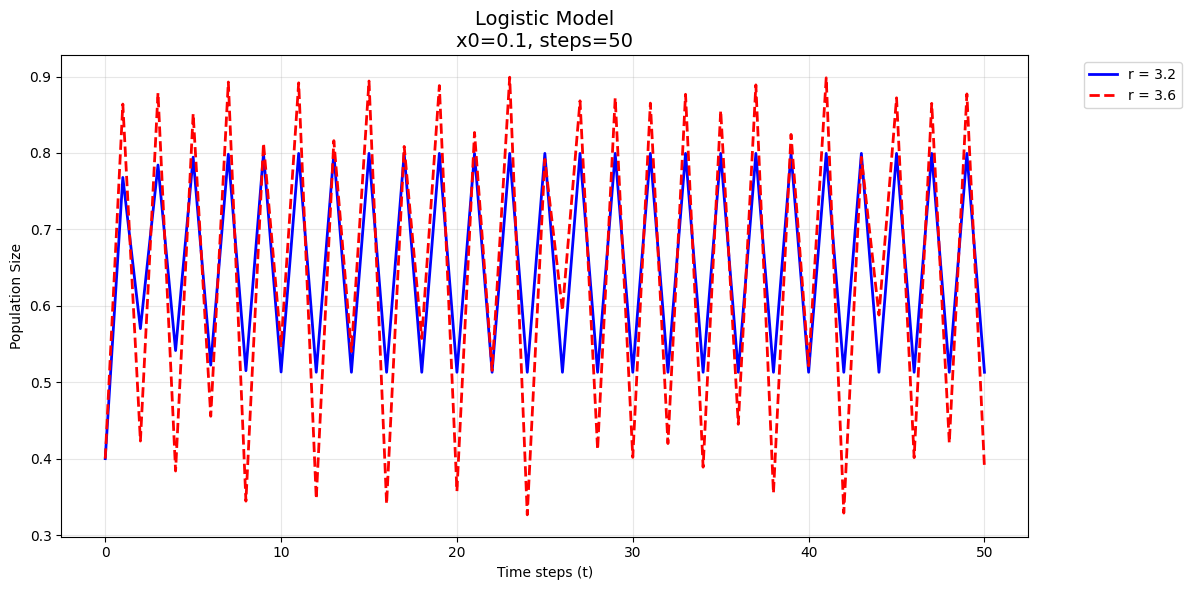

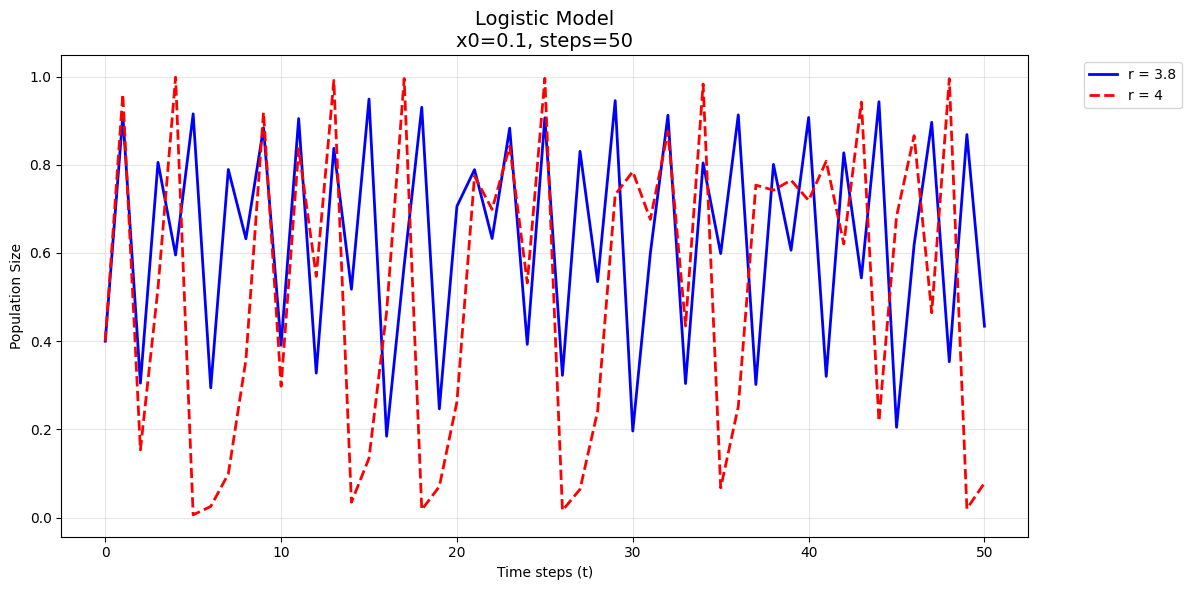

In [3]:
# 2. Логистическая модель: Сравнение разных параметров r
print("\n2. Логистическая модель - сравнение параметров")
params_list = [[1.0, 2.0, 2.2, 2.4, 2.6, 2.8], [3.2, 3.6], [3.8, 4]]
trajs = []
labels = []

for i in range(len(params_list)):
    for r in params_list[i]:
        model = LogisticModel({'r': r})
        traj = model.simulate(initial_state=0.4, steps=50)
        trajs.append(traj)
        labels.append(f'r = {r}')
    
    plot_trajectory(trajs, 
                    title="Logistic Model", 
                    param_str="x0=0.1, steps=50",
                    labels=labels)
    
    trajs.clear()
    labels.clear()

#  r = 1.0     → Вымирание
#  1.0 < r < 3.0 → Стабильная точка
#  r = 3.0     → Первая бифуркация (удвоение периода)
#  3.0 < r < 3.57 → Каскад удвоений периода
#  r ≈ 3.57    → Начало хаоса
#  r = 4.0     → Полный хаос



3.  Модель Морана - сравнение параметров


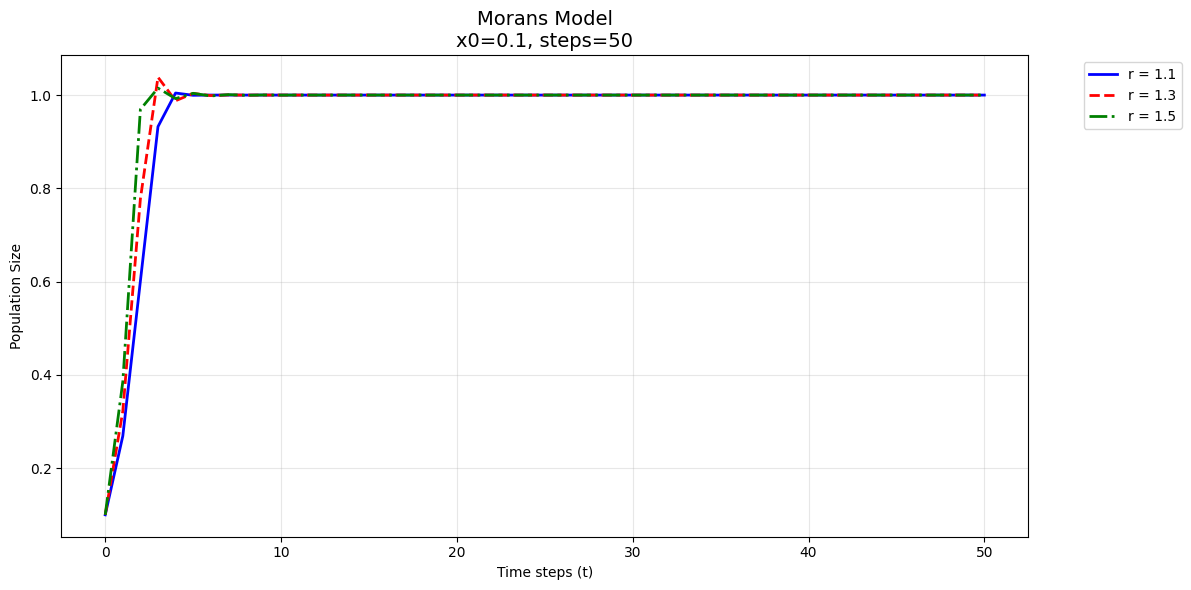

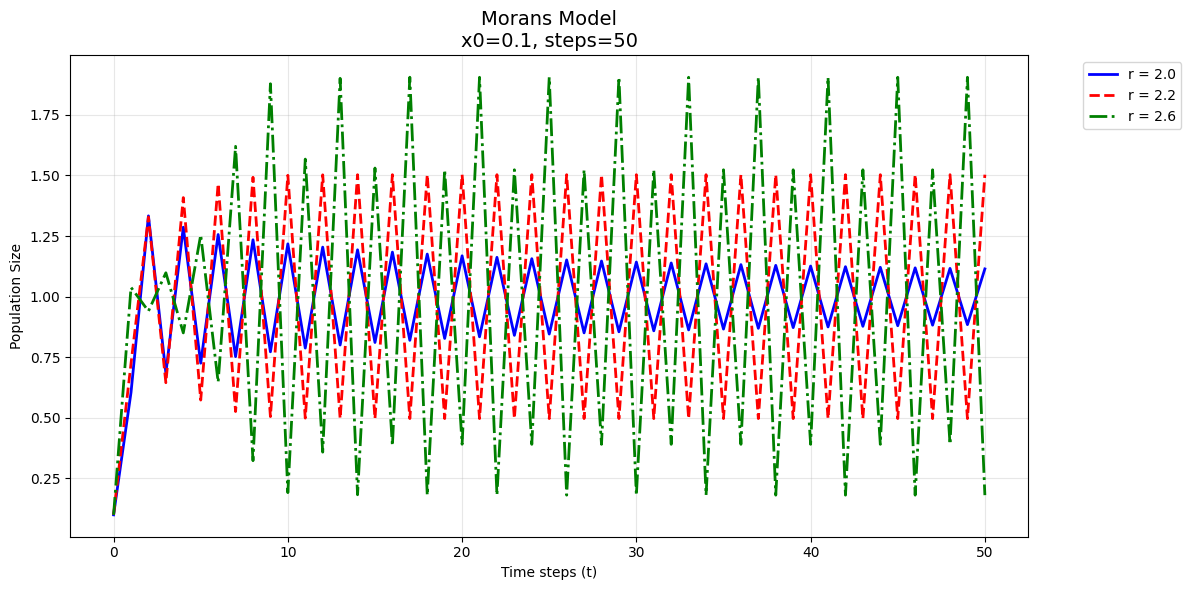

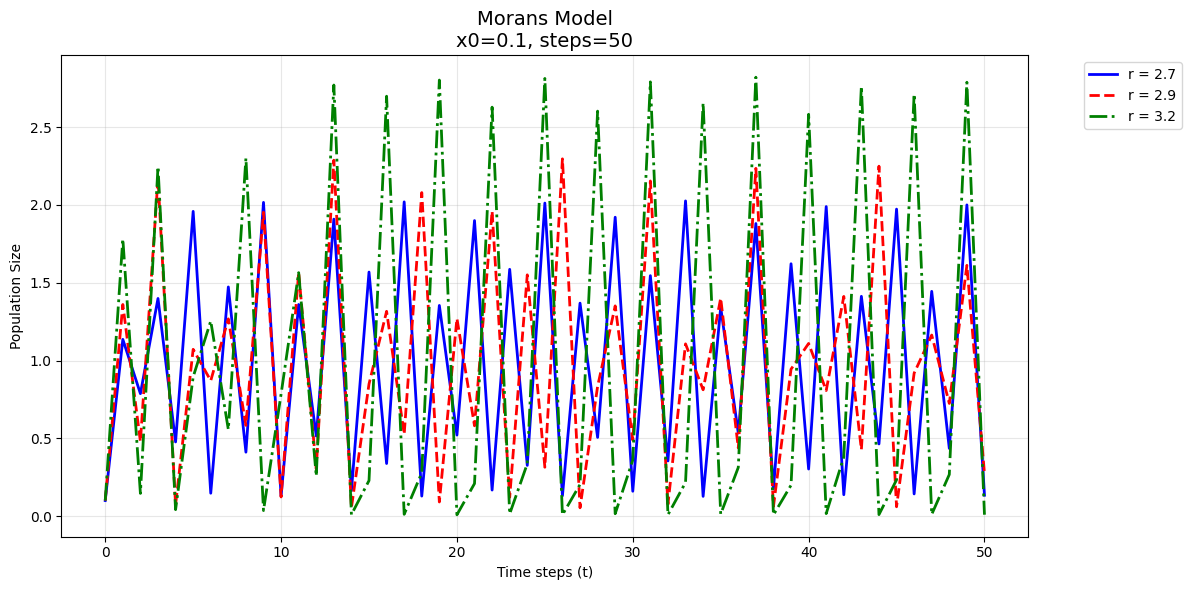

In [4]:
# 3. Модель Морана: Сравнение разных параметров r
print("\n3.  Модель Морана - сравнение параметров")
params_list = [[1.1, 1.3, 1.5], [2.0, 2.2, 2.6], [ 2.7, 2.9, 3.2]]
trajs = []
labels = []

for i in range(len(params_list)):
    for r in params_list[i]:
        model = MoranModel({'r': r})
        traj = model.simulate(initial_state=0.1, steps=50)
        trajs.append(traj)
        labels.append(f'r = {r}')
    
    plot_trajectory(trajs, 
                    title="Morans Model", 
                    param_str="x0=0.1, steps=50",
                    labels=labels)
    
    trajs.clear()
    labels.clear()

#  r < 1.0     → Вымирание
#  1.0 < r < 2.0 → Стабильная точка
#  r = 2.0     → Первая бифуркация
#  2.0 < r < 2.69 → Удвоения периода  
#  r ≈ 2.69    → Начало хаоса
#  r > 2.69    → Хаотическое поведение

4. Модель Хозяин-Паразит (Николсон-Бейли)
3. Модель Хозяин-Паразит (Николсон-Бейли)


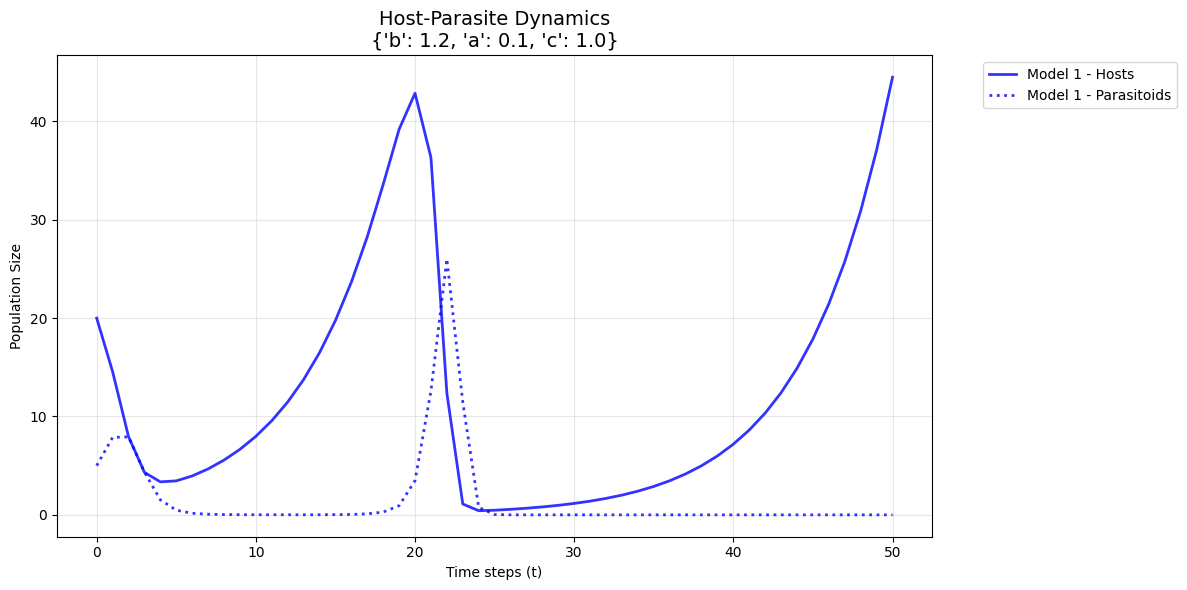

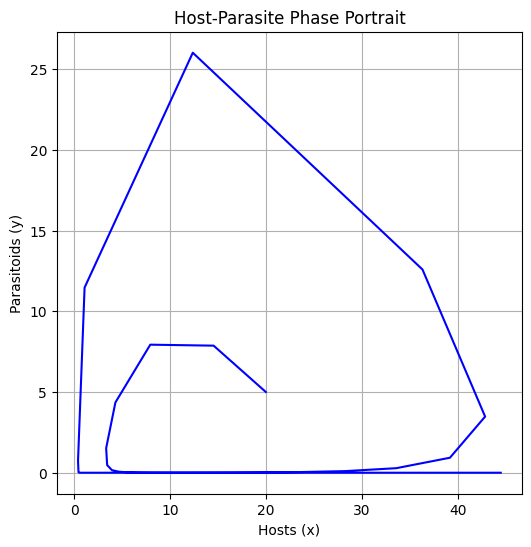

In [5]:
# 4. Модель Хозяин-Паразит
print("4. Модель Хозяин-Паразит (Николсон-Бейли)")

 # b - Рождаемость хозяев
 # a - Эффективность поиска паразитов
 # c - К-во паразитов из одного хозяина

# 3. Модель Хозяин-Паразит
print("3. Модель Хозяин-Паразит (Николсон-Бейли)")
# Параметры выбраны для демонстрации колебаний (нестабильности)
# x - хозяева, y - паразиты
params_hp = {'b': 1.2, 'a': 0.1, 'c': 1.0} 
hp_model = HostParasiteModel(params_hp)

# Начальные условия x0, y0
init_hp = [20, 5] 
traj_hp = hp_model.simulate(initial_state=init_hp, steps=50)

plot_trajectory(traj_hp, title="Host-Parasite Dynamics", param_str=f"{params_hp}")
plot_phase_portrait(traj_hp, title="Host-Parasite Phase Portrait")


4. Построение бифуркационной диаграммы для Логистической модели...
Это показывает переход от стабильности к циклам и хаосу.


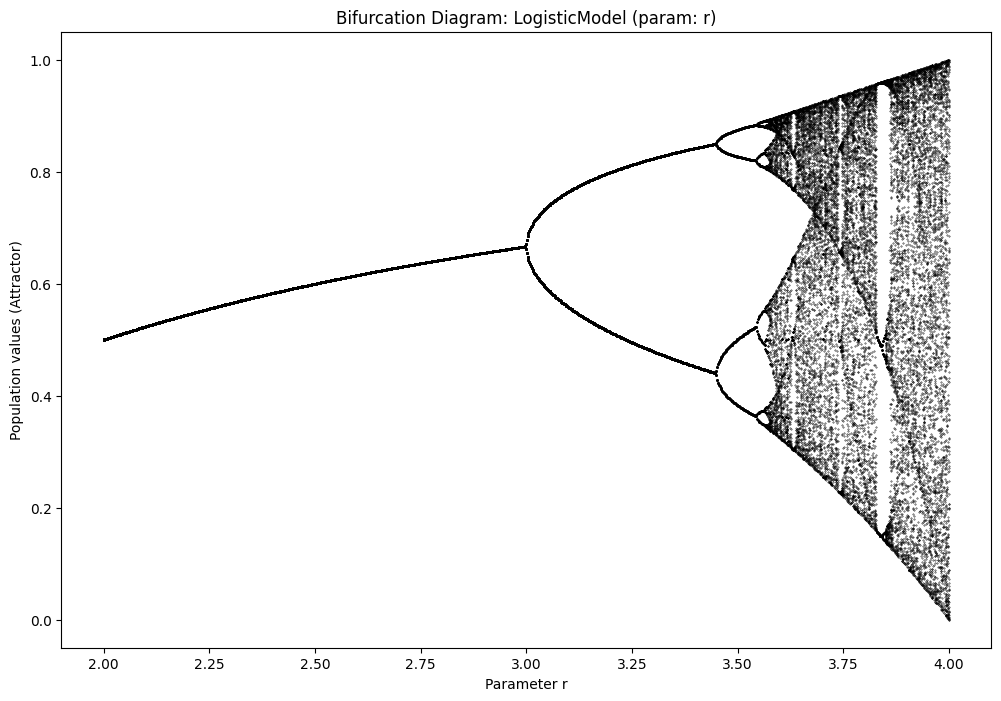

In [6]:
# --- ЗАДАНИЕ 3: Бифуркационный анализ ---
# Определение значений параметров, где меняется поведение [cite: 29]

print("\n4. Построение бифуркационной диаграммы для Логистической модели...")
print("Это показывает переход от стабильности к циклам и хаосу.")

# Диапазон r от 2.0 до 4.0
r_range = np.linspace(2.0, 4.0, 1000)
plot_bifurcation_diagram(
    model_class=LogisticModel, 
    param_name='r', 
    param_range=r_range, 
    steps=1000,      # Длительность симуляции
    last_steps=100,  # Сколько последних точек брать
    x0=0.1
)



5. Построение бифуркационной диаграммы для модели Морана...


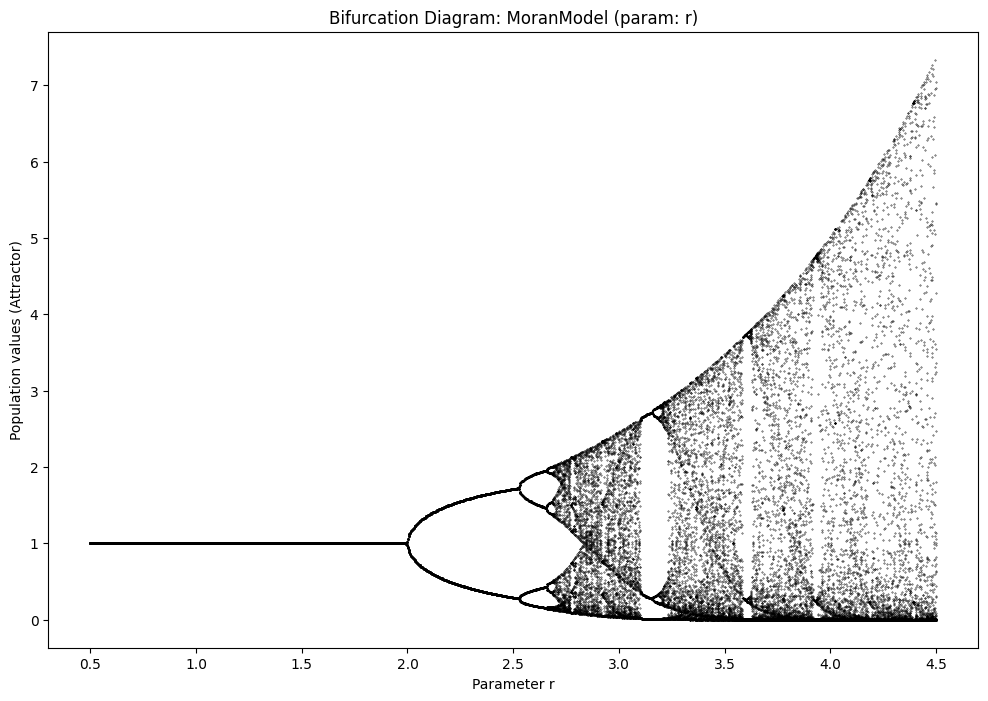

In [7]:
print("\n5. Построение бифуркационной диаграммы для модели Морана...")
# Для модели Морана диапазон r обычно берется от 0 до 5
r_range_moran = np.linspace(0.5, 4.5, 1000)
plot_bifurcation_diagram(
    model_class=MoranModel,
    param_name='r',
    param_range=r_range_moran,
    steps=500,
    last_steps=50
)